In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sci
from pathlib import Path
import os
retval = os.getcwd()#sets path

############################################################################


#   !!!!Always restart and run kernal due too os paths!!!!


############################################################################

#Do you want too split the data/graphs into chunks? 
Split_data_into_txt_files = True  #{ True , False }
Split_data_into_graphs = True #{ True , False }


#Variables 
filename = "2a led test loops see code for timings"  
p = Path(r"C:\Users\530750\Google Drive\1) University\4) Masters\2) Data\1% QD to toulene\3) Devices\Cross bar\90% qd+pmma\spin speeds vs thickness\1000rpm\section mid\10\set 2 02.02.22")   #read the path as a string
q = p / filename                                

#Number of seconds per chunk        
s_wanted=1200 #in seconds

#3600 = 1hr
#1800 = 30 mins
#900  = 15 mins
#600  = 10 mins 


In [2]:
def filereader(readthisfile):
    with open(readthisfile, "r") as f:    #open the file as read only
        fread = f.read()
        return fread
A = filereader(q)
B = A.split('\n')

#split the data into 3 arrays

Data = []
for i in range(len(B)):          
    C = (B[i].split('\t'))
    D = []
    for j in range(len(C)):
        if C[j]!= '' :
            D.append(float(C[j]))
    Data.append(D)

C0 = []
C1 = []
C2 = []

for i in range(len(Data)):
    if Data [i] !=[]:
        C0.append(Data[i][0])
        C1.append(Data[i][1])
        C2.append(Data[i][2])              #remove for non looped data
        
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


#Sub Folder creation
if os.path.isdir(f"{filename}") == False :              
    os.mkdir(f"{filename}")
    os.chdir(f"{filename}")
    for dir in ['Split Data', 'Graphs']:
        os.mkdir(dir)
    print ("folders created")
os.chdir(retval)

#got too change directory too origional file path


In [3]:
##Chunk Length in seconds##

#defines chunk sizes (persentage as n)
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]         

a=(C2[-1]/s_wanted)

chunk_size=round(len(C2)/a)

#defines x and y and z 
x=list(chunks(C0, chunk_size))
y=list(chunks(C1, chunk_size))
z=list(chunks(C2, chunk_size))

b=round(len(C2)/chunk_size)

def timefortitle(s_wanted):
    if s_wanted == 3600:
        return("1hr")
    else:
        return f"{int(s_wanted / 60)}mins"


In [4]:
#Split_data_into_txt_files

for i in range (b):
    if Split_data_into_txt_files: 
        
        #Create new folder for data
        os.chdir(retval)
        os.chdir(f"{filename}")
        os.chdir('Split Data')
        new_directory_split_data = f"{timefortitle(s_wanted)}  intervals"
        createFolder(new_directory_split_data)
        with open(f"{new_directory_split_data}/{z[i][i]}s to {z[i][-1]}s ({timefortitle(s_wanted)}  intervals) data.txt","w+") as f:
        #Write data too the file
            for j in range(len((x[i]))):
                f.write(str(x[i][j]) + " "*10 + str(y[i][j])+ " "*10 + str(z[i][j]) + "\n")
if not Split_data_into_txt_files:
    print ("Data not split change variable in cell 1")
os.chdir(retval)
   



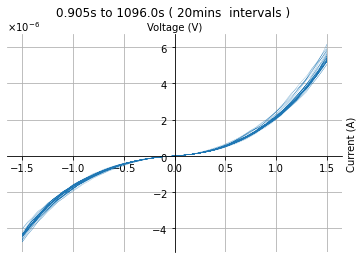

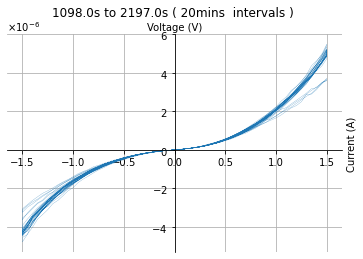

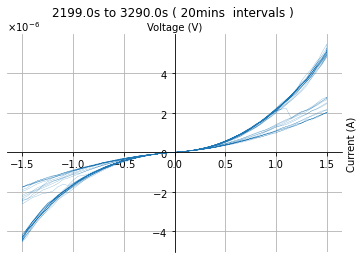

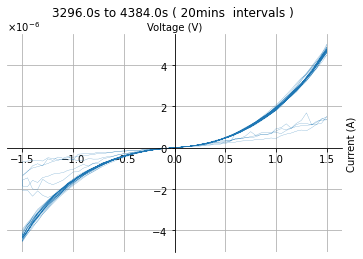

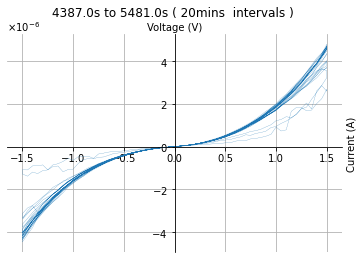

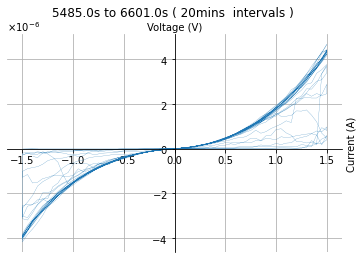

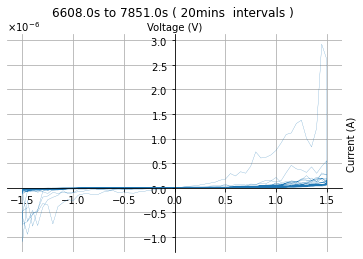

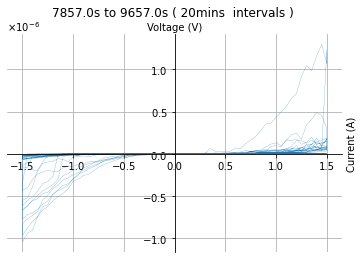

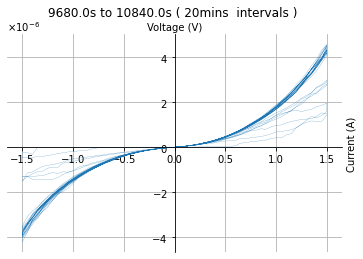

In [5]:
#Create Graph

if Split_data_into_graphs:
    for i in range(b):

        #ignore this for calculating persentage for graph title/name
        var2= (i* 10)+ 10  #upper persentage
        var3= var2 - (i* 10)  #lower persentage
        percent= (var2- var3)

        #plot figure 
        fig = plt.figure()
        ax = plt.gca()
        ax.plot(x[i], y[i], linewidth=0.2)

        #changes graph
        ax.grid(True)
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.set_title((f"{z[i][i]}s to {z[i][-1]}s ( {timefortitle(s_wanted)}  intervals ) "  ))
        #ax.set_title((f"{percent} to {var2} percent of {filename}") ,{'fontsize':10}  )
        plt.xlabel("Voltage (V)")
        plt.ylabel("Current (A)")
        ax.xaxis.set_label_position('top')
        ax.yaxis.set_label_position('right')

        #Changing axis lables

        #plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        plt.ticklabel_format(axis="y", useMathText='true', style="sci", scilimits=(0,0))


        os.chdir(retval)
        os.chdir(f"{filename}")
        os.chdir('Graphs')
        
        if os.path.isdir(f"{timefortitle(s_wanted)} intervals") == False :              
            os.mkdir(f"{timefortitle(s_wanted)} intervals")
        
        os.chdir(f"{timefortitle(s_wanted)} intervals")
        fig.savefig( f"{z[i][i]}s to {z[i][-1]}s ( {timefortitle(s_wanted)}  intervals ).png", dpi=600)
        plt.show()

       #fig.savefig('Sub Directory/graph.png')


    if s_wanted > (C2[-1]):
        print ("change s_wanted number too large")

if not Split_data_into_graphs:
    print("Graphs not shown change variable in cell 1")
os.chdir(retval)

In [6]:
retval = os.getcwd()
print (retval)


C:\Users\530750\Google Drive\1) University\4) Masters\2) Data\Code-Backup


In [7]:
print (p)

C:\Users\530750\Google Drive\1) University\4) Masters\2) Data\1% QD to toulene\3) Devices\Cross bar\90% qd+pmma\spin speeds vs thickness\1000rpm\section mid\10\set 2 02.02.22


In [8]:
os.chdir(Path(p))
retval

'C:\\Users\\530750\\Google Drive\\1) University\\4) Masters\\2) Data\\Code-Backup'

In [9]:
retval

'C:\\Users\\530750\\Google Drive\\1) University\\4) Masters\\2) Data\\Code-Backup'

In [10]:
#!/usr/bin/python
import os

path = "/usr/tmp"

# Check current working directory.
retval = os.getcwd()
print ()"Current working directory %s" % retval)

# Now change the directory
os.chdir( path )

# Check current working directory.
retval = os.getcwd()

print (retval)

SyntaxError: invalid syntax (<ipython-input-10-058f1d231fc8>, line 8)